In [2]:
# отключим предупреждения Anaconda
import warnings

warnings.simplefilter("ignore")
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [3]:
df = pd.read_csv("https://github.com/roman-yatsenko/mlcourse.ai/raw/master/data/telecom_churn.csv")

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 1. Признаки по одному 
## 1.1. Количественные
Гистограмма и боксплот

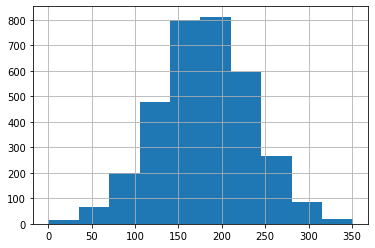

In [5]:
df["Total day minutes"].hist();

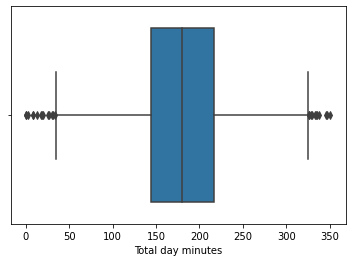

In [6]:
sns.boxplot(df["Total day minutes"]);

# 1.2. Категориальные
countplot

In [7]:
df["State"].value_counts().head()

WV    106
MN     84
NY     83
AL     80
OH     78
Name: State, dtype: int64

In [8]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

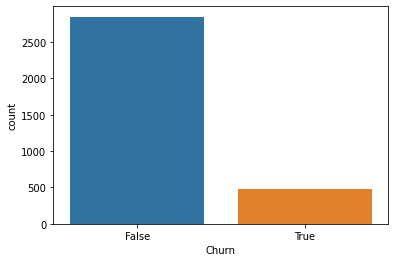

In [9]:
sns.countplot(df["Churn"]);

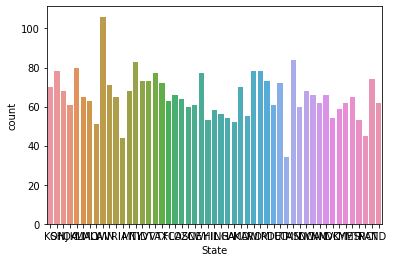

In [10]:
sns.countplot(df["State"]);

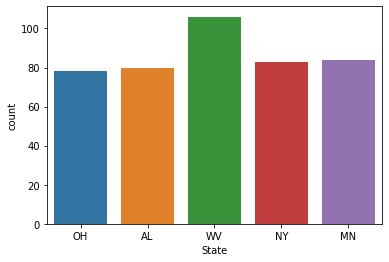

In [11]:
sns.countplot(df[df["State"].isin(df["State"].value_counts().head().index)]["State"]);

# 2. Взаимодействия признаков
## 2.1. Количественный с количественным
pairplot, scatterplot, корреляции, heatmap

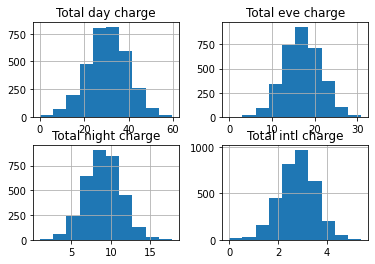

In [12]:
feat = [f for f in df.columns if "charge" in f]

df[feat].hist();

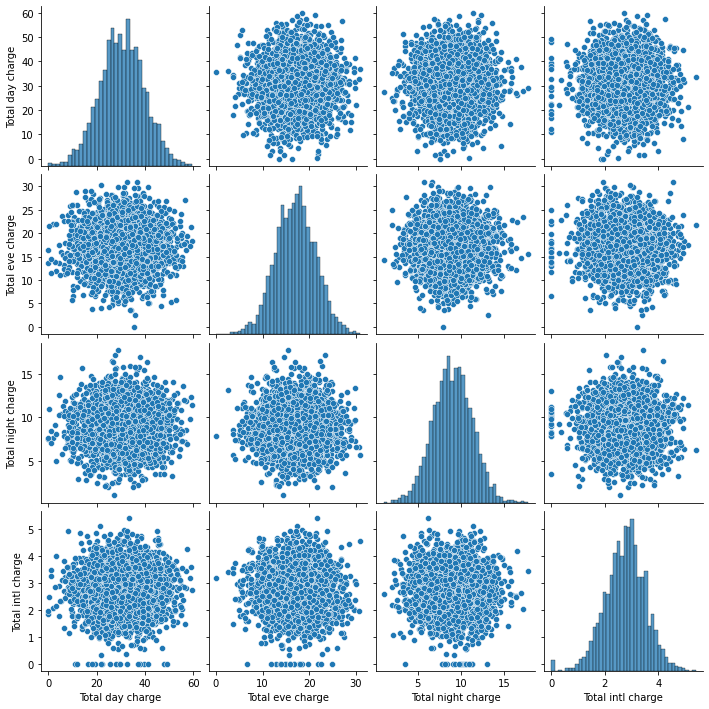

In [13]:
sns.pairplot(df[feat]);

In [14]:
df[~df["Churn"]].head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


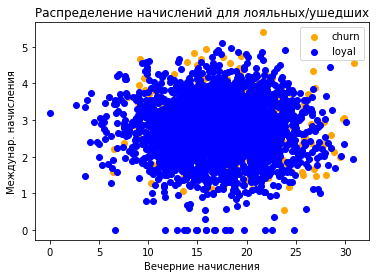

In [15]:
plt.scatter(
    df[df["Churn"]]["Total eve charge"],
    df[df["Churn"]]["Total intl charge"],
    color="orange",
    label="churn",
)
plt.scatter(
    df[~df["Churn"]]["Total eve charge"],
    df[~df["Churn"]]["Total intl charge"],
    color="blue",
    label="loyal",
)
plt.xlabel("Вечерние начисления")
plt.ylabel("Междунар. начисления")
plt.title("Распределение начислений для лояльных/ушедших")
plt.legend();

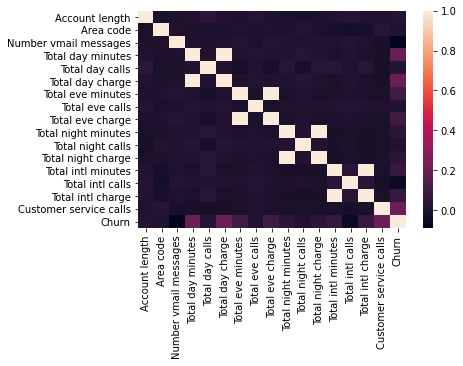

In [16]:
sns.heatmap(df.corr());

In [17]:
df.drop(feat, axis=1, inplace=True)

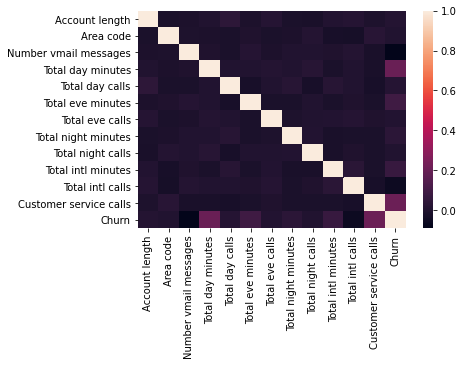

In [18]:
sns.heatmap(df.corr());

## 2.2.  Количественный с категориальным
boxplot, violinplot

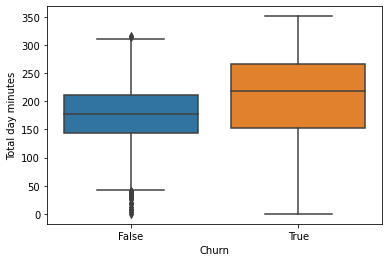

In [19]:
sns.boxplot(x="Churn", y="Total day minutes", data=df);

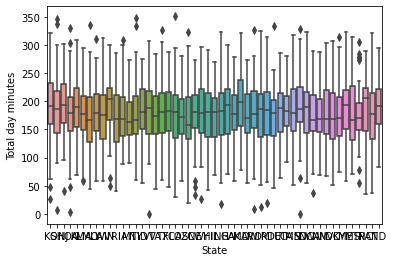

In [20]:
sns.boxplot(x="State", y="Total day minutes", data=df);

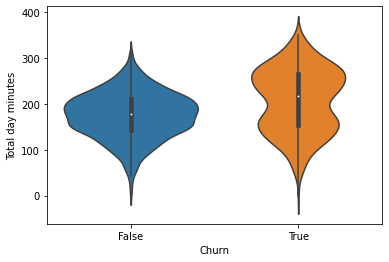

In [21]:
sns.violinplot(x="Churn", y="Total day minutes", data=df);

In [22]:
df.groupby("International plan")["Total day minutes"].mean()

International plan
No     178.893887
Yes    187.986997
Name: Total day minutes, dtype: float64

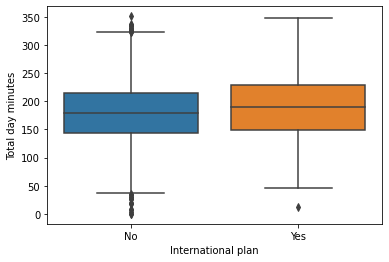

In [23]:
sns.boxplot(x="International plan", y="Total day minutes", data=df);

## 2.3. Категориальный с категориальным
countplot

In [24]:
pd.crosstab(df["Churn"], df["International plan"])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


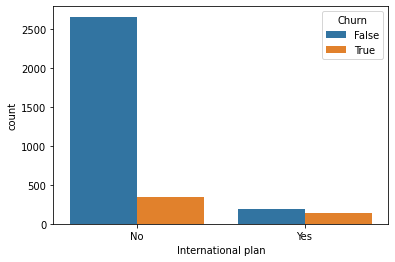

In [25]:
sns.countplot(x="International plan", hue="Churn", data=df);

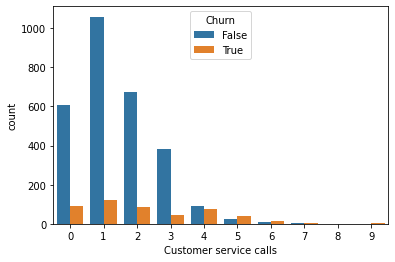

In [26]:
sns.countplot(x="Customer service calls", hue="Churn", data=df);